In [241]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys/')
from tools import plotting as myplt

In [236]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge
dpi = 500

In [396]:
perveances = np.load('_output/data/perveances.npy')
cost_lists = np.load('_output/data/cost_lists.npy')
cost_lists = {'lsq': cost_lists[0], 'rba': cost_lists[1]}

tbt_params_lists = np.load('_output/data/tbt_params_lists.npy')
matched_params_lists = [np.array([tbt_params[0] for tbt_params in tbt_params_list]) for tbt_params_list in tbt_params_lists]

tbt_stats_lists = []
for tbt_params_list in tbt_params_lists:
    tbt_stats_list = []
    for tbt_params in tbt_params_list:
        tbt_stats = ea.Stats(mode=1)
        tbt_stats.read_env(tbt_params)
        tbt_stats_list.append(tbt_stats)
    tbt_stats_lists.append(tbt_stats_list)

tbt_stats_lists = {'lsq': tbt_stats_lists[0], 'rba': tbt_stats_lists[1]}
matched_params_lists = {'lsq': matched_params_lists[0], 'rba': matched_params_lists[1]}
nsamples = len(perveances)

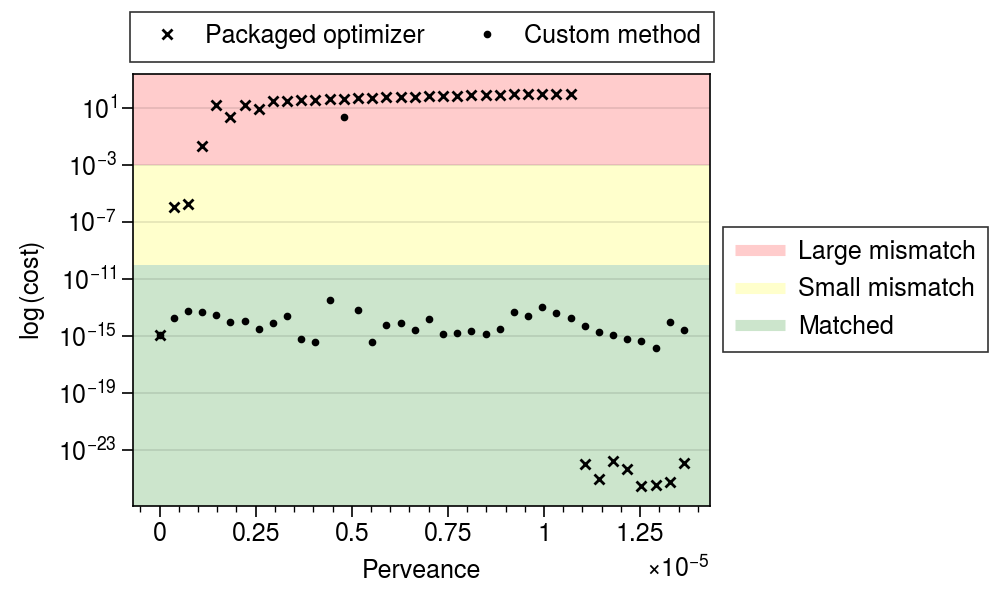

In [492]:
fig, ax = plot.subplots(figsize=(5, 3))
start = 0
skip = 2
alpha = 0.2
kws = dict(ms=3.5, lw=0)

g1 = ax.plot(perveances[start::skip], cost_lists['lsq'][start::skip], marker='x', color='k', **kws)
g2 = ax.plot(perveances[start::skip], cost_lists['rba'][start::skip], marker='.', color='k', **kws)
ax.format(xlabel='Perveance', ylabel=r'$log\,(cost)$', yscale='log', yformatter='log')
ax.grid(axis='x')
ylim = ax.get_ylim()
ax.axhspan(0, 1e-10, facecolor='green', alpha=alpha)
ax.axhspan(1e-10, 1e-3, facecolor='yellow', alpha=alpha)
ax.axhspan(1e-3, 1e10, facecolor='red', alpha=alpha)
ax.set_ylim(ylim)

ax.legend([g1, g2], labels=['Packaged optimizer', 'Custom method'], ncols=2, loc='t')

custom_lines = [Line2D([0], [0], color='red', lw=4, alpha=alpha),
                Line2D([0], [0], color='yellow', lw=4, alpha=alpha),
                Line2D([0], [0], color='green', lw=4, alpha=alpha)]
ax.legend(custom_lines, ['Large mismatch', 'Small mismatch', 'Matched'], ncols=1, loc='r')

plt.savefig('_output/figures/costfunc.png', dpi=dpi, facecolor='white')

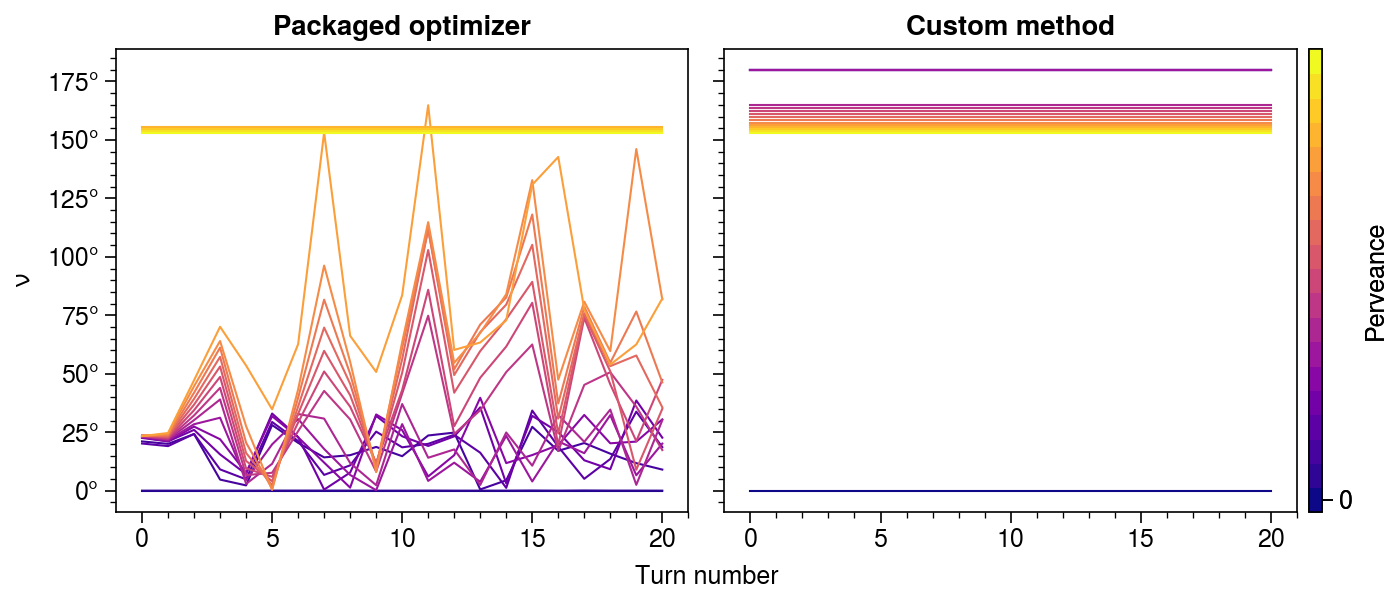

In [504]:
start, stop, skip = (0, -1, 4)
peverances_subset = perveances[start:stop:skip]
_cmap = 'plasma'
cycle = myplt.colorcycle(plot.Colormap(_cmap), len(peverances_subset), start_end=(0, 1))

fig, axes = plot.subplots(ncols=2, figsize=(7, 3))
for ax, method in zip(axes, ['lsq', 'rba']):
    axes.set_prop_cycle(cycle)
    tbt_stats_lists_subset = tbt_stats_lists[method][start:stop:skip]
    for i, stats in enumerate(tbt_stats_lists_subset):
        data = stats.twiss4D['nu'].values
        if i == 0:
            data = np.full(len(data), 0.0)
        colorbar = 'r' if method == 'rba' else None
        lw = 0.75 if method == 'lsq' else 0.75
        ax.plot(data, marker=None, ms=None, lw=lw, colorbar=colorbar, 
                colorbar_kw=dict(label='Perveance', width='0.5em', ticklabels=['0'], ticks=[0]))
    ax.format(grid=False, xlabel='Turn number', ylabel=r'$\nu$', yformatter='deg', toplabels=['Packaged optimizer', 'Custom method'])

plt.savefig('_output/figures/tbt_{}.png'.format(_cmap), dpi=dpi, facecolor='white')